In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

In [44]:
df=pd.read_csv('Padded.csv')

In [45]:
df.drop(['Unnamed: 0','P_ID','Time','BP_Hg','Src_Pressure','Src_Temperature','Src_WindSpeed','Src_Humidity'],axis=1,inplace=True)

In [46]:
df_2=df.copy(deep=True)

In [47]:
corr_matrix=df_2.corr().abs()
half_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
dropped_columns = [column for column in half_matrix.columns if any(half_matrix[column] > 0.8)]
df_2.drop(dropped_columns, axis=1, inplace=True)

/var/folders/41/rlmz0mh15dx9_qw9xxbv4mq00000gn/T/ipykernel_30335/3278247437.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  half_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [48]:
df_2

,Speed_MPH,ATP,JF,FF,Src_Weather_Info,NR_HR,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Weekday,Gender_Female
0,0.0,31.800000,0.64059,34.05,Clear,22.532948,29,38,10,8,6,7,6,1,1
1,0.0,31.800000,0.64059,34.05,Clear,22.532948,29,38,10,8,6,7,6,1,1
2,0.0,31.800000,0.64059,34.05,Clear,22.532948,29,38,10,8,6,7,6,1,1
3,0.0,31.800000,0.64059,34.05,Clear,22.532948,29,38,10,8,6,7,6,1,1
4,0.0,31.800000,0.64059,34.05,Clear,22.532948,29,38,10,8,6,7,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305981,0.0,2.700000,0.00000,28.46,Thunderstorm,45.415647,28,50,6,7,6,5,8,0,1
305982,0.0,2.700000,0.00000,28.46,Thunderstorm,45.415647,28,50,6,7,6,5,8,0,1
305983,0.0,2.050000,0.00000,28.46,Thunderstorm,45.415647,28,50,6,7,6,5,8,0,1
305984,0.0,1.166667,0.00000,28.46,Thunderstorm,45.415647,28,50,6,7,6,5,8,0,1


In [49]:
df_2['Src_Weather_Info'].replace(['Clear','Clouds','Drizzle','Haze','Mist','Thunderstorm'],
                        [0,1,2,3,4,5], inplace=True)

In [50]:
df_2

,Speed_MPH,ATP,JF,FF,Src_Weather_Info,NR_HR,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Weekday,Gender_Female
0,0.0,31.800000,0.64059,34.05,0,22.532948,29,38,10,8,6,7,6,1,1
1,0.0,31.800000,0.64059,34.05,0,22.532948,29,38,10,8,6,7,6,1,1
2,0.0,31.800000,0.64059,34.05,0,22.532948,29,38,10,8,6,7,6,1,1
3,0.0,31.800000,0.64059,34.05,0,22.532948,29,38,10,8,6,7,6,1,1
4,0.0,31.800000,0.64059,34.05,0,22.532948,29,38,10,8,6,7,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305981,0.0,2.700000,0.00000,28.46,5,45.415647,28,50,6,7,6,5,8,0,1
305982,0.0,2.700000,0.00000,28.46,5,45.415647,28,50,6,7,6,5,8,0,1
305983,0.0,2.050000,0.00000,28.46,5,45.415647,28,50,6,7,6,5,8,0,1
305984,0.0,1.166667,0.00000,28.46,5,45.415647,28,50,6,7,6,5,8,0,1


## Predict BPM difference

In [51]:
temp=df_2['NR_HR']
df_3=df_2.drop(['NR_HR'], axis=1)
Y=temp.values
X=df_2.values

In [52]:
df_3

,Speed_MPH,ATP,JF,FF,Src_Weather_Info,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Weekday,Gender_Female
0,0.0,31.800000,0.64059,34.05,0,29,38,10,8,6,7,6,1,1
1,0.0,31.800000,0.64059,34.05,0,29,38,10,8,6,7,6,1,1
2,0.0,31.800000,0.64059,34.05,0,29,38,10,8,6,7,6,1,1
3,0.0,31.800000,0.64059,34.05,0,29,38,10,8,6,7,6,1,1
4,0.0,31.800000,0.64059,34.05,0,29,38,10,8,6,7,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305981,0.0,2.700000,0.00000,28.46,5,28,50,6,7,6,5,8,0,1
305982,0.0,2.700000,0.00000,28.46,5,28,50,6,7,6,5,8,0,1
305983,0.0,2.050000,0.00000,28.46,5,28,50,6,7,6,5,8,0,1
305984,0.0,1.166667,0.00000,28.46,5,28,50,6,7,6,5,8,0,1


In [53]:
from sklearn import ensemble

In [54]:
from sklearn.ensemble import GradientBoostingRegressor

In [55]:
from sklearn.model_selection import KFold

In [56]:
kf = KFold(n_splits=5,random_state=42,shuffle=True)

In [57]:
for train_index,val_index in kf.split(X):
    X_train,X_test = df_3.iloc[train_index],df_3.iloc[val_index],
    y_train,y_test = temp.iloc[train_index],temp.iloc[val_index]

In [58]:
gb = GradientBoostingRegressor(learning_rate=0.1)

In [59]:
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [60]:
gb.score(X_test, y_test)

0.5245609977295184

In [61]:
print(gb.feature_importances_)

[0.00926895 0.12635551 0.1106394  0.03037249 0.05935203 0.20039706
 0.07514274 0.04314253 0.10264916 0.10777    0.04699924 0.01947993
 0.06708771 0.00134325]


In [62]:
# X_train.keys()

In [63]:
from matplotlib.pyplot import figure

In [64]:
# feature_importance = gb.feature_importances_
# # make importances relative to max importance
# feature_importance = 100.0 * (feature_importance / feature_importance.max())
# sorted_idx = np.argsort(feature_importance)
# print(sorted_idx)
# pos = np.arange(sorted_idx.shape[0]) + .5
# f=plt.figure()
# f.set_figwidth(10)
# f.set_figheight(8)
# plt.barh(pos, feature_importance[sorted_idx], align='center')
# plt.yticks(pos, X_train.keys()[sorted_idx])
# plt.xlabel('Relative Importance')
# plt.title('Variable Importance')
# plt.show()

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
rf=RandomForestRegressor()

In [67]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [68]:
rf.score(X_test, y_test)

0.8785887306182253

In [69]:
print(rf.feature_importances_)

[0.09584608 0.16312301 0.20087341 0.12618008 0.06864259 0.11980673
 0.0242709  0.0074421  0.06472228 0.03308687 0.0268454  0.0046151
 0.06178944 0.00275603]


[13 11  7  6 10  9 12  8  4  0  5  3  1  2]


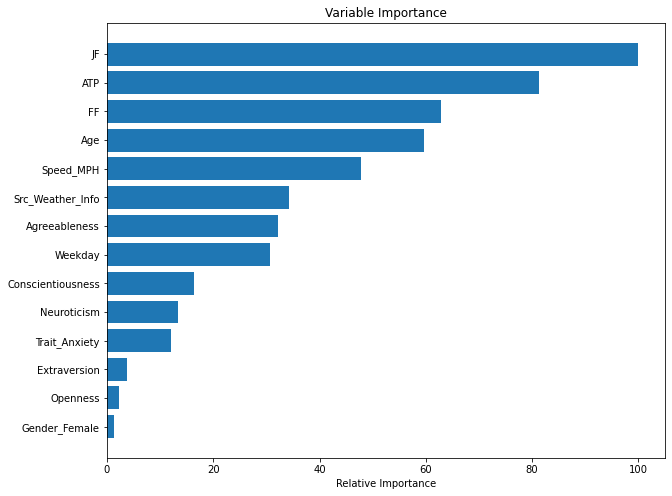

In [70]:
feature_importance = rf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
print(sorted_idx)
pos = np.arange(sorted_idx.shape[0]) + .5
f=plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [71]:
rf_perm_featimp=permutation_importance(rf, X_train, y_train, n_repeats=10, random_state=0)

In [72]:
forest_importances = pd.DataFrame(data={'Importance': rf_perm_featimp.importances_mean, 'Feature':df_3.columns})

In [73]:
df_sorted=forest_importances.sort_values('Importance')

In [74]:
df_sorted

,Importance,Feature
13,0.002920,Gender_Female
6,0.031318,Trait_Anxiety
11,0.033065,Openness
7,0.054363,Extraversion
9,0.080776,Conscientiousness
10,0.146254,Neuroticism
0,0.266882,Speed_MPH
1,0.291642,ATP
12,0.348340,Weekday
8,0.360303,Agreeableness


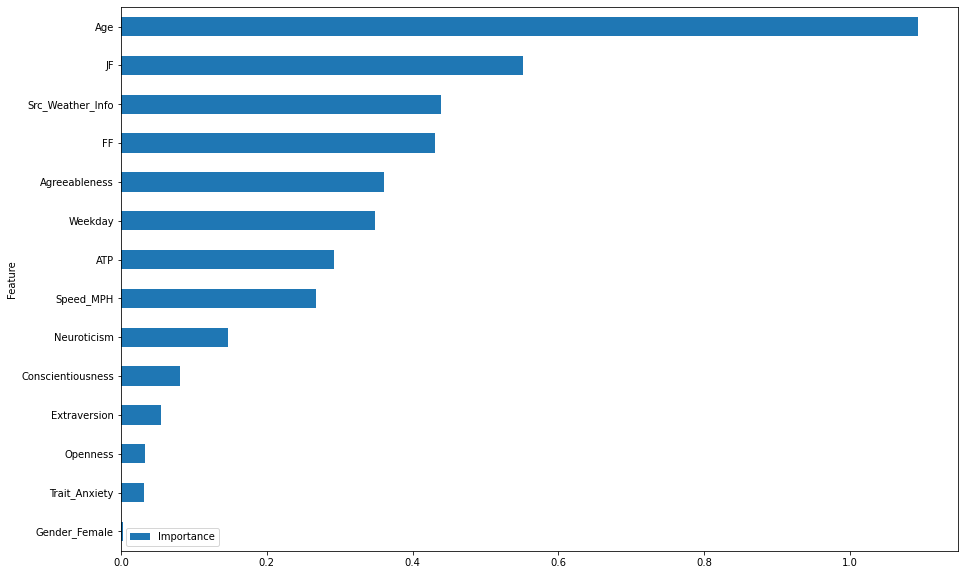

In [75]:
ax = df_sorted.plot.barh(x='Feature',y='Importance', rot=0, figsize=(15,10))

In [76]:
from sklearn import linear_model

In [77]:
# clf=linear_model.Lasso(alpha=0.05)
# clf.fit(X_train, y_train)

In [78]:
# clf.score(X_test, y_test)

In [79]:
from sklearn.ensemble import AdaBoostRegressor

In [80]:
# ab=AdaBoostRegressor(loss='exponential', n_estimators=25)

In [81]:
# ab.fit(X_train,y_train)

In [82]:
# ab.score(X_test, y_test)

In [83]:
# feature_importance = ab.feature_importances_
# # make importances relative to max importance
# feature_importance = 100.0 * (feature_importance / feature_importance.max())
# sorted_idx = np.argsort(feature_importance)
# print(sorted_idx)
# pos = np.arange(sorted_idx.shape[0]) + .5
# f=plt.figure()
# f.set_figwidth(10)
# f.set_figheight(8)
# plt.barh(pos, feature_importance[sorted_idx], align='center')
# plt.yticks(pos, X_train.keys()[sorted_idx])
# plt.xlabel('Relative Importance')
# plt.title('Variable Importance')
# plt.show()

In [84]:
from sklearn.tree import DecisionTreeRegressor

In [85]:
# dt=DecisionTreeRegressor()

In [86]:
# dt.fit(X_train,y_train)

In [87]:
# dt.score(X_test, y_test)

In [88]:
# feature_importance = dt.feature_importances_
# # make importances relative to max importance
# feature_importance = 100.0 * (feature_importance / feature_importance.max())
# sorted_idx = np.argsort(feature_importance)
# print(sorted_idx)
# pos = np.arange(sorted_idx.shape[0]) + .5
# f=plt.figure()
# f.set_figwidth(10)
# f.set_figheight(8)
# plt.barh(pos, feature_importance[sorted_idx], align='center')
# plt.yticks(pos, X_train.keys()[sorted_idx])
# plt.xlabel('Relative Importance')
# plt.title('Variable Importance')
# plt.show()

In [89]:
from sklearn.linear_model import ElasticNet

In [90]:
# en=ElasticNet(alpha=0.1)

In [91]:
# en.fit(X_train, y_train)

In [92]:
# en.score(X_test,y_test)

In [93]:
# feature_importance = pd.Series(index = X_train.columns, data = np.abs(en.coef_))

# n_selected_features = (feature_importance>0).sum()
# print('{0:d} features, reduction of {1:2.2f}%'.format(
#     n_selected_features,(1-n_selected_features/len(feature_importance))*100))

# feature_importance.sort_values().tail(30).plot(kind = 'bar', figsize = (18,6))

In [94]:
from sklearn.ensemble import VotingRegressor

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_train, y_train, test_size=0.33, random_state=1)

In [97]:
import xgboost as xgb

In [98]:
# bst=xgb.train(X_train.values, y_train.values)

In [99]:
# xgb.fit(X_train,y_train)

In [100]:
# xgb.score(X_test, y_test)

In [101]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [102]:
def get_models():
    models = list()
    #models.append(('ht', HistGradientBoostingRegressor()))
    models.append(('gb', GradientBoostingRegressor()))
    models.append(('ab', AdaBoostRegressor()))
    models.append(('rf', RandomForestRegressor()))
    return models

In [103]:
from sklearn.metrics import accuracy_score
def evaluate(models, X_train, X_test, y_train, y_test):
    scores = list()
    for name, model in models:
        model.fit(X_train, y_train)
        score=model.score(X_test,y_test)
        scores.append(score)
    return scores

In [104]:
models=get_models()

In [105]:
scores=evaluate(models, X_train_sub, X_test_sub, y_train_sub, y_test_sub)

In [106]:
ensemble=VotingRegressor(estimators=models, weights=scores)

In [107]:
ensemble.fit(X_train, y_train)

VotingRegressor(estimators=[('gb', GradientBoostingRegressor()),
                            ('ab', AdaBoostRegressor()),
                            ('rf', RandomForestRegressor())],
                weights=[0.5288172605854069, 0.20042425189866797,
                         0.8682196671405735])

In [108]:
ensemble.score(X_test, y_test)

0.8028341003400702

In [109]:
def feature_importance(ensemble, weights):
    feature_importance = dict()
    for est in ensemble.estimators_:
        feature_importance[str(est)] = est.feature_importances_
    
    fe_scores = [0]*len(list(feature_importance.values())[0])
    for idx, imp_score in enumerate(feature_importance.values()):
        imp_score_with_weight = imp_score*weights[idx]
        fe_scores = list(np.add(fe_scores, list(imp_score_with_weight)))
    return fe_scores

In [110]:
final_df=pd.DataFrame()
final_df['Feature']=X_train.columns
final_df['Importance']=feature_importance(ensemble, scores)
new_df=final_df.sort_values('Importance')

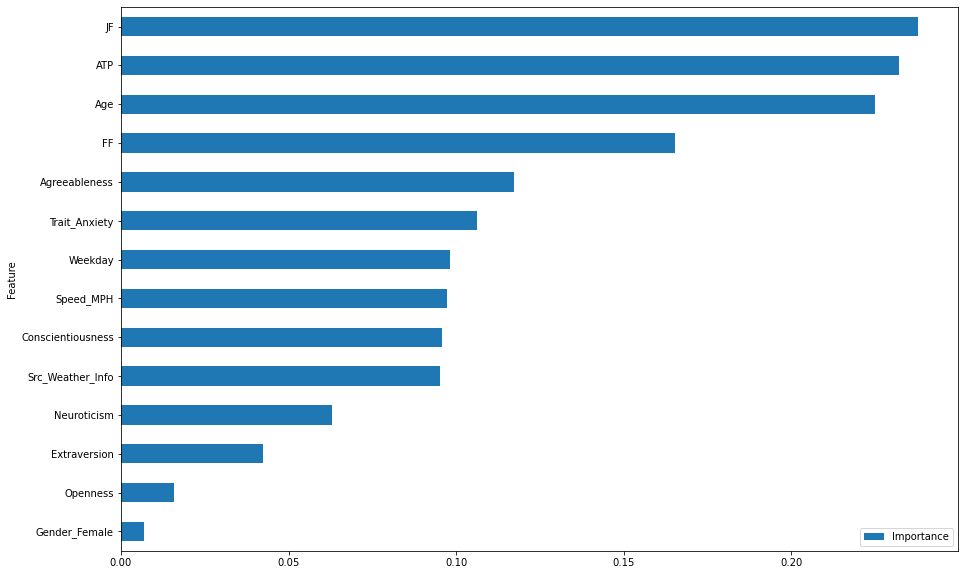

In [111]:
ax = new_df.plot.barh(x='Feature',y='Importance', rot=0, figsize=(15,10))

In [112]:
result=permutation_importance(ensemble, X_train, y_train, n_repeats=10, random_state=0)

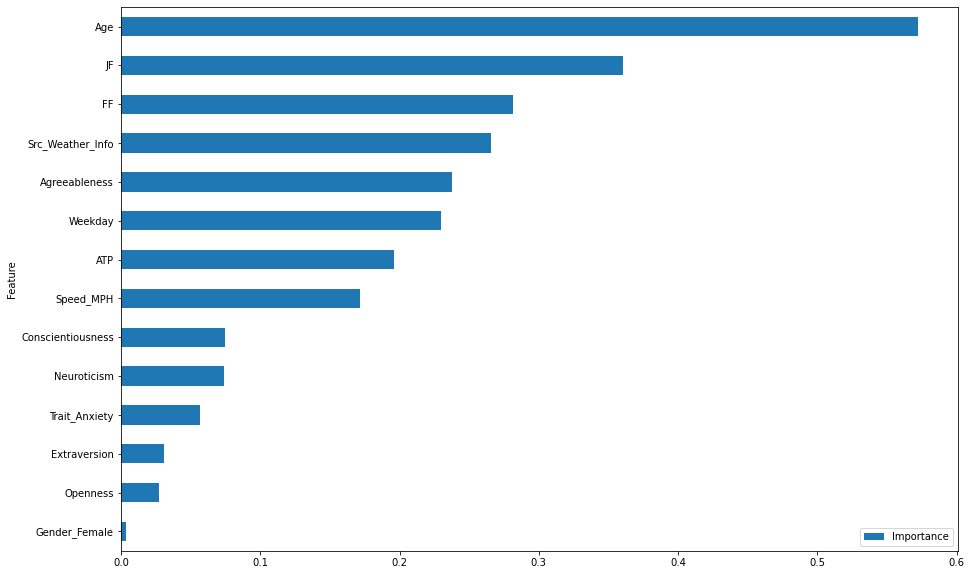

In [113]:
ensemble_importances = pd.DataFrame(data={'Importance': result.importances_mean, 'Feature':df_3.columns})
df_sorted=ensemble_importances.sort_values('Importance')
ax = df_sorted.plot.barh(x='Feature',y='Importance', rot=0, figsize=(15,10))

In [114]:
df_3=df_2.drop(['Speed_MPH'],axis=1)

In [115]:
df_3.corr()['NR_HR'].sort_values()

Age                 -0.162653
ATP                 -0.103804
Openness            -0.101796
FF                  -0.074933
Gender_Female       -0.047555
JF                   0.014938
Agreeableness        0.033793
Extraversion         0.046044
Src_Weather_Info     0.086560
Neuroticism          0.113174
Conscientiousness    0.116207
Weekday              0.151911
Trait_Anxiety        0.153085
NR_HR                1.000000
Name: NR_HR, dtype: float64

In [116]:
df_2

,Speed_MPH,ATP,JF,FF,Src_Weather_Info,NR_HR,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Weekday,Gender_Female
0,0.0,31.800000,0.64059,34.05,0,22.532948,29,38,10,8,6,7,6,1,1
1,0.0,31.800000,0.64059,34.05,0,22.532948,29,38,10,8,6,7,6,1,1
2,0.0,31.800000,0.64059,34.05,0,22.532948,29,38,10,8,6,7,6,1,1
3,0.0,31.800000,0.64059,34.05,0,22.532948,29,38,10,8,6,7,6,1,1
4,0.0,31.800000,0.64059,34.05,0,22.532948,29,38,10,8,6,7,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305981,0.0,2.700000,0.00000,28.46,5,45.415647,28,50,6,7,6,5,8,0,1
305982,0.0,2.700000,0.00000,28.46,5,45.415647,28,50,6,7,6,5,8,0,1
305983,0.0,2.050000,0.00000,28.46,5,45.415647,28,50,6,7,6,5,8,0,1
305984,0.0,1.166667,0.00000,28.46,5,45.415647,28,50,6,7,6,5,8,0,1


As we can see, wind speed, pressure, and temperature are the best predictors of BPM according to the models. Wind speed and pressure are plausible, but temperature seems a little weird. 

No notable difference between when BPM is subtracted or divided, as suspected. 

# Normalizing the Data to check if anything changes

In [117]:
normalized_df=(df_2-df_2.min())/(df_2.max()-df_2.min())

In [118]:
temp=normalized_df['NR_HR']
df_5=normalized_df.drop(['NR_HR'], axis=1)
Y=temp.values
X=normalized_df.values

In [119]:
for train_index,val_index in kf.split(X):
    X_train,X_test = df_5.iloc[train_index],df_5.iloc[val_index],
    y_train,y_test = temp.iloc[train_index],temp.iloc[val_index]

In [120]:
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_train, y_train, test_size=0.33, random_state=1)

In [121]:
scores=evaluate(models, X_train_sub, X_test_sub, y_train_sub, y_test_sub)

In [122]:
ensemble=VotingRegressor(estimators=models, weights=scores)

In [123]:
ensemble.fit(X_train, y_train)

VotingRegressor(estimators=[('gb', GradientBoostingRegressor()),
                            ('ab', AdaBoostRegressor()),
                            ('rf', RandomForestRegressor())],
                weights=[0.5288184202785304, 0.2151120411951104,
                         0.8680910639600329])

In [124]:
ensemble.score(X_test, y_test)

0.8004838742429013

In [130]:
final_df=pd.DataFrame()
final_df['Feature']=X_train.columns
final_df['Importance']=feature_importance(ensemble, scores)
final_df.sort_values('Importance', ascending=False)
new_df=final_df.sort_values('Importance')

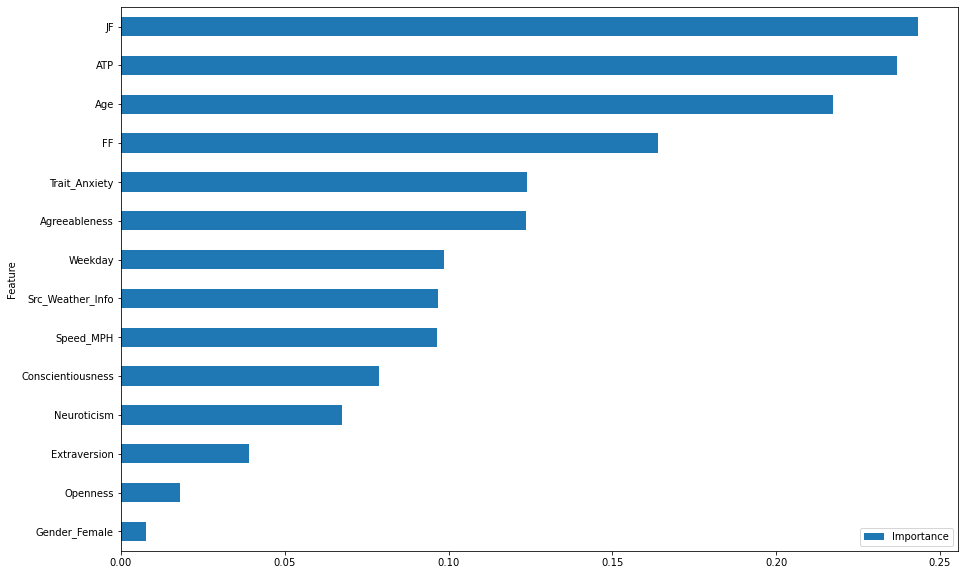

In [131]:
ax = new_df.plot.barh(x='Feature',y='Importance', rot=0, figsize=(15,10))

In [127]:
normalized_df

,Speed_MPH,ATP,JF,FF,Src_Weather_Info,NR_HR,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Weekday,Gender_Female
0,0.0,0.349451,0.149145,0.403595,0.0,0.285436,0.242424,0.25,1.000000,0.833333,0.2,0.571429,0.428571,1.0,1.0
1,0.0,0.349451,0.149145,0.403595,0.0,0.285436,0.242424,0.25,1.000000,0.833333,0.2,0.571429,0.428571,1.0,1.0
2,0.0,0.349451,0.149145,0.403595,0.0,0.285436,0.242424,0.25,1.000000,0.833333,0.2,0.571429,0.428571,1.0,1.0
3,0.0,0.349451,0.149145,0.403595,0.0,0.285436,0.242424,0.25,1.000000,0.833333,0.2,0.571429,0.428571,1.0,1.0
4,0.0,0.349451,0.149145,0.403595,0.0,0.285436,0.242424,0.25,1.000000,0.833333,0.2,0.571429,0.428571,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305981,0.0,0.029670,0.090909,0.322557,1.0,0.563126,0.212121,0.75,0.428571,0.666667,0.2,0.285714,0.714286,0.0,1.0
305982,0.0,0.029670,0.090909,0.322557,1.0,0.563126,0.212121,0.75,0.428571,0.666667,0.2,0.285714,0.714286,0.0,1.0
305983,0.0,0.022527,0.090909,0.322557,1.0,0.563126,0.212121,0.75,0.428571,0.666667,0.2,0.285714,0.714286,0.0,1.0
305984,0.0,0.012821,0.090909,0.322557,1.0,0.563126,0.212121,0.75,0.428571,0.666667,0.2,0.285714,0.714286,0.0,1.0


In [128]:
df_2

,Speed_MPH,ATP,JF,FF,Src_Weather_Info,NR_HR,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Weekday,Gender_Female
0,0.0,31.800000,0.64059,34.05,0,22.532948,29,38,10,8,6,7,6,1,1
1,0.0,31.800000,0.64059,34.05,0,22.532948,29,38,10,8,6,7,6,1,1
2,0.0,31.800000,0.64059,34.05,0,22.532948,29,38,10,8,6,7,6,1,1
3,0.0,31.800000,0.64059,34.05,0,22.532948,29,38,10,8,6,7,6,1,1
4,0.0,31.800000,0.64059,34.05,0,22.532948,29,38,10,8,6,7,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305981,0.0,2.700000,0.00000,28.46,5,45.415647,28,50,6,7,6,5,8,0,1
305982,0.0,2.700000,0.00000,28.46,5,45.415647,28,50,6,7,6,5,8,0,1
305983,0.0,2.050000,0.00000,28.46,5,45.415647,28,50,6,7,6,5,8,0,1
305984,0.0,1.166667,0.00000,28.46,5,45.415647,28,50,6,7,6,5,8,0,1
